In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
import squarify

#dataset select
#df1 = pd.read_csv('LCA_Disclosure_Data_FY2022_Q2.csv')
#df2 = pd.read_csv('PW_Disclosure_Data_FY2022_Q2_revised_form.csv', low_memory=False)
df3 = pd.read_csv('PERM_Disclosure_Data_FY2022_Q2.csv', low_memory=False)

#df1.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
#df2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df3.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE
0,A-19310-79633,Denied,2019-11-01,2021-10-01,N,NaN,NaN,N,"GGE CONSULTING ENGINEERS, INC.",5250 CALLAGHAN ROAD,...,Y,N,N,Y,N,ALFREDO LOZANO,ATTORNEY,ALOZANO@ABOGADOLOZANO.COM,JANICE LITTLE,VP FINANCE AND ADMINISTRATIVE
1,A-20053-22155,Certified-Expired,2020-02-22,2021-10-01,N,NaN,NaN,N,"CAPGEMINI AMERICA, INC.",333 W. WACKER DRIVE,...,Y,N,N,Y,N,Timothy G Payne,Partner,tpayne@sidley.com,Laura Heino,Supervising Associate
2,A-20084-34435,Certified-Expired,2020-03-30,2021-10-01,N,NaN,NaN,N,242 Business Inc. dba Time Mart 16,16145 FM 1485,...,Y,N,N,N,N,Anil R Ali,Attorney at Law,legal@anilalilaw.com,Karim Karedia,President
3,A-20076-31087,Denied,2020-04-13,2021-10-01,N,NaN,NaN,N,Dennis Bustamante,11855 NW 30TH ST,...,NaN,N,N,N,Y,,NaN,NaN,DENNIS BUSTAMANTE,HOUSEHOLDER
4,A-20156-61798,Denied,2020-07-08,2021-10-01,N,NaN,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,NaN,N,N,Y,N,Mustafa Amil,Staff Immigration Attorney,GoogleDOL@balglobal.com,Victoria Cheng,Global MobilityImmigration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57528,A-21363-91853,Withdrawn,2022-03-29,2022-03-31,N,NaN,NaN,N,QUEST DIAGNOSTICS INCORPORATED,500 PLAZA DRIVE,...,NaN,NaN,N,Y,N,William A Stock,Attorney,wstock@klaskolaw.com,Fernando Reyes,Human Resources Immigration Specialist
57529,A-22087-31737,Withdrawn,2022-03-30,2022-03-31,N,NaN,NaN,N,AMAZON.COM SERVICES LLC,2250 7TH AVE,...,Y,N,N,Y,N,Scott Gregory,Attorney,HVPERM@dgilaw.com,DanielChongli Van Den HandelWu,HR Immigration
57530,A-22089-33322,Withdrawn,2022-03-31,2022-03-31,N,NaN,NaN,N,"TERRA LEGNO, LTD.",35 DALE AVE,...,NaN,NaN,N,N,N,Mauricio Martinez,Attorney,mmartinez@egsllp.com,Richmond Eshaghoff,President
57531,A-22090-33853,Withdrawn,2022-03-31,2022-03-31,N,NaN,NaN,N,"TERRA LEGNO, LTD.",35 DALE AVE,...,NaN,NaN,N,N,N,Mauricio Martinez,Attorney,mmartinez@egsllp.com,Richmond Eshaghoff,President


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

1. dataset shpae

In [16]:
df1.shape

NameError: name 'df1' is not defined

In [17]:
df2.shape

NameError: name 'df2' is not defined

In [3]:
df3.shape

(57533, 154)

1. dataset column select

In [120]:
df_main = df3
print(df_main.columns)
print(len(df_main.columns))

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'PREVIOUS_SWA_CASE_NUMBER_STATE',
       'SCHD_A_SHEEPHERDER', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       'EMPLOYER_ADDRESS_2', 'EMPLOYER_CITY', 'EMPLOYER_STATE_PROVINCE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'EMPLOYER_NUM_EMPLOYEES',
       'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'NAICS_CODE',
       'FW_OWNERSHIP_INTEREST', 'EMP_CONTACT_NAME', 'EMP_CONTACT_ADDRESS_1',
       'EMP_CONTACT_ADDRESS_2', 'EMP_CONTACT_CITY',
       'EMP_CONTACT_STATE_PROVINCE', 'EMP_CONTACT_COUNTRY',
       'EMP_CONTACT_POSTAL_CODE', 'EMP_CONTACT_PHONE', 'EMP_CONTACT_EMAIL',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_FIRM_NAME',
       'AGENT_ATTORNEY_PHONE', 'AGENT_ATTORNEY_PHONE_EXT',
       'AGENT_ATTORNEY_ADDRESS_1', 'AGENT_ATTORNEY_ADDRESS_2',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE_PROVINCE',
       'AGENT_ATTORNEY_COUNTRY

In [83]:
df_sample = df_main['FOREIGN_WORKER_BIRTH_COUNTRY']
lst = []

for i in range(df_sample.count()[0]):
    lst.append(df_sample['FOREIGN_WORKER_BIRTH_COUNTRY'].values[i][0])

df_sample = pd.DataFrame(data = lst, columns = ['FOREIGN_WORKER_BIRTH_COUNTRY'])


In [105]:
len(df_sample.value_counts())

164

In [100]:
df_sample.count()

FOREIGN_WORKER_BIRTH_COUNTRY    45466
dtype: int64

In [4]:
columns = ['PW_SOC_TITLE','FOREIGN_WORKER_BIRTH_COUNTRY','PW_SKILL_LEVEL', 'PW_WAGE', 'PW_UNIT_OF_PAY','WORKSITE_STATE', 'MINIMUM_EDUCATION', 'MAJOR_FIELD_OF_STUDY', 'FOREIGN_WORKER_BIRTH_COUNTRY', 'FOREIGN_WORKER_EDUCATION', 'FOREIGN_WORKER_INFO_MAJOR', 'EMPLOYER_NAME']

#columns =["PREVAILING_WAGE","VISA_CLASS", "SOC_TITLE", "WORKSITE_STATE", "PW_WAGE_LEVEL"]

In [121]:

df_main = df_main[columns]
df_main["PW_WAGE"] = df_main["PW_WAGE"].str.replace(pat=r'$', repl=r'', regex=True)
df_main["PW_WAGE"] = df_main["PW_WAGE"].str.replace(pat=r',', repl=r'', regex=True)
df_main['PW_WAGE'] = pd.to_numeric(df_main['PW_WAGE'])
df_main =df_main.dropna(axis = 0)
df_main =df_main.dropna(axis = 1)

print(df_main.shape)

#exceptional case


(45466, 12)


<ipython-input-121-6d42284c1584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["PW_WAGE"] = df_main["PW_WAGE"].str.replace(pat=r'$', repl=r'', regex=True)
<ipython-input-121-6d42284c1584>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["PW_WAGE"] = df_main["PW_WAGE"].str.replace(pat=r',', repl=r'', regex=True)
<ipython-input-121-6d42284c1584>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [6]:
soc_list = df_main["PW_SOC_TITLE"].values

In [7]:
soc_set = set(soc_list)
len(soc_set)

2545

In [7]:
df_main[['WORKSITE_STATE', 'PW_WAGE']]

,WORKSITE_STATE,PW_WAGE
0,TEXAS,65936.0
1,ILLINOIS,97781.0
4,CALIFORNIA,73923.0
5,CALIFORNIA,131726.0
6,CALIFORNIA,131726.0
...,...,...
57526,NORTH CAROLINA,172016.0
57527,TEXAS,94037.0
57528,CALIFORNIA,52062.0
57529,WASHINGTON,77189.0


In [8]:
m = folium.Map([40, -102], zoom_start=4)
folium.Choropleth(
    geo_data='us-states.json', # 경계선 좌표값이 담긴 데이터
    data=df_main, # Series or DataFrame 넣으면 된다
    columns=['WORKSITE_STATE', 'PW_WAGE'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.id', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='BuPu',
    fill_opacity=0.5, # 색 투명도
    line_opacity=0.5, # 선 투명도
    legend_name='Unemployment rate (%)' # 범례
).add_to(m)
m

In [8]:
remove_title = []
for title in soc_set:
    if df_main.loc[df_main["PW_SOC_TITLE"] == title].count()[1] < 10:
        remove_title.append(title)
    

In [9]:
len(remove_title)

2299

In [10]:
for title in remove_title:
    df_main = df_main.loc[df_main["PW_SOC_TITLE"] != title]


In [19]:
df_main.describe(include="all")

,PW_SOC_TITLE,FOREIGN_WORKER_BIRTH_COUNTRY,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WORKSITE_STATE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,FOREIGN_WORKER_BIRTH_COUNTRY,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,EMPLOYER_NAME
count,41463,41463,41463,41463.000000,41463,41463,41463,41463,41463,41463,41463,41463
unique,246,161,4,NaN,1,55,6,10854,161,6,4564,8912
top,"Software Developers, Applications",INDIA,Level II,NaN,Year,CALIFORNIA,Master's,Computer Science,INDIA,Master's,COMPUTER SCIENCE,AMAZON.COM SERVICES LLC
freq,12357,27602,16880,NaN,41463,10457,21270,5631,27602,23802,7473,2565
mean,NaN,NaN,NaN,102336.917493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30775.436889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,16860.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,80475.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,99944.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,120578.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df_main = df_main.loc[df_main["PW_UNIT_OF_PAY"] == "Year"]
df_main["FOREIGN_WORKER_BIRTH_COUNTRY"].values[0][1]


'MEXICO'

In [76]:
lst = []
for i in range(len(df_main["FOREIGN_WORKER_BIRTH_COUNTRY"].values)):
    lst.append(df_main["FOREIGN_WORKER_BIRTH_COUNTRY"].values[i][1])
lst

['INDIA',
 'INDIA',
 'CHINA',
 'CHINA',
 'INDIA',
 'INDIA',
 'CHINA',
 'CHINA',
 'INDIA',
 'CHINA',
 'CHINA',
 'CHINA',
 'ARGENTINA',
 'INDIA',
 'FRANCE',
 'CHINA',
 'INDIA',
 'INDIA',
 'CHINA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'CHINA',
 'CHINA',
 'CHINA',
 'INDIA',
 'CHINA',
 'CHINA',
 'CHINA',
 'CHINA',
 'CHINA',
 'CHINA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'CHINA',
 'INDIA',
 'INDIA',
 'INDIA',
 'CHINA',
 'INDIA',
 'FRANCE',
 'CHINA',
 'CHINA',
 'INDIA',
 'COLOMBIA',
 'INDIA',
 'CANADA',
 'CHINA',
 'EGYPT',
 'TAIWAN',
 'CHINA',
 'INDIA',
 'HONG KONG',
 'INDIA',
 'CHINA',
 'INDIA',
 'CHINA',
 'KENYA',
 'CHINA',
 'INDIA',
 'EGYPT',
 'CHINA',
 'CHINA',
 'CHINA',
 'MEXICO',
 'CHINA',
 'CHINA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDONESIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'TAIWAN',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',
 'INDIA',

In [83]:
df_main['country'] = lst
df_main.describe(include='all')
df_main = df_main.loc[df_main["country"] == "SOUTH KOREA"]
df_main

ValueError: Length of values (41463) does not match length of index (646)

In [89]:
df_kr = df_main

In [83]:
df_sample = pd.DataFrame(df_main['PW_SOC_TITLE'].value_counts())
df_sample.describe()

,PW_SOC_TITLE
count,246.000000
mean,168.548780
std,892.885474
min,7.000000
25%,14.000000
50%,25.000000
75%,74.750000
max,12357.000000


In [84]:
df_sample= df_sample.loc[df_sample['PW_SOC_TITLE'] > 300]
df_sample.describe()

,PW_SOC_TITLE
count,19.000000
mean,1607.684211
std,2905.297308
min,303.000000
25%,380.000000
50%,511.000000
75%,1131.500000
max,12357.000000


(100.0, 20000.0)

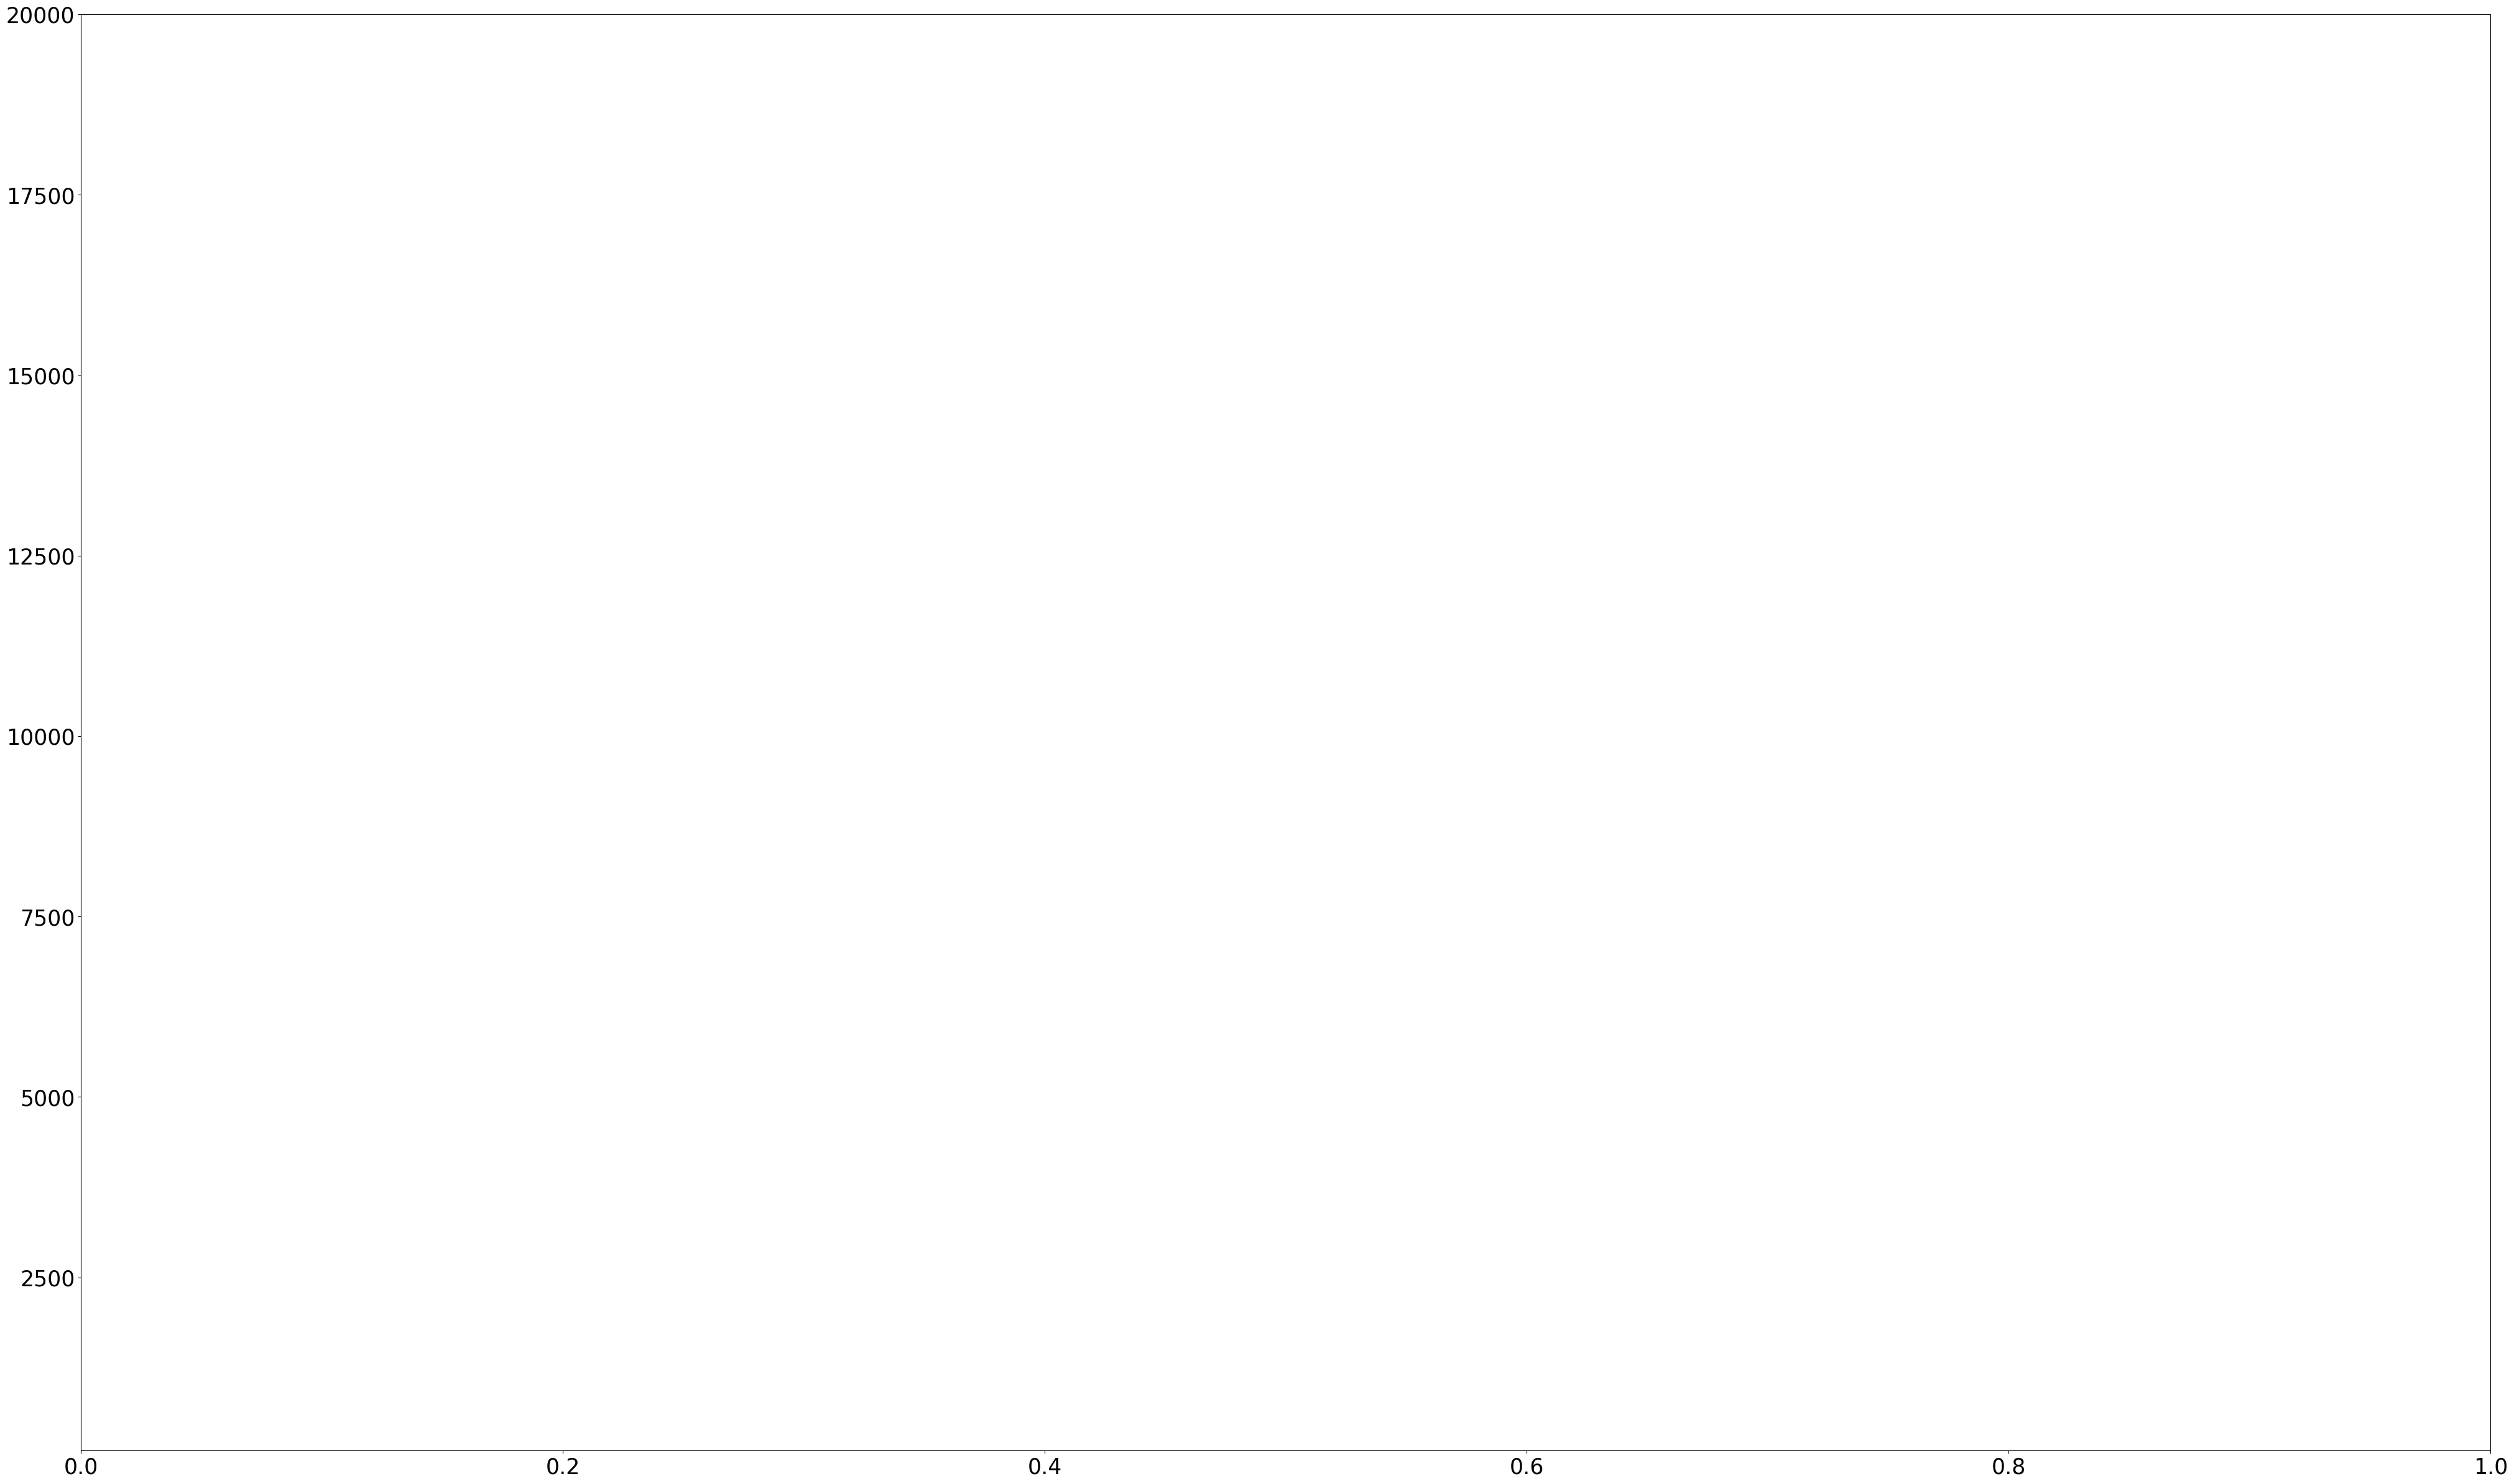

In [91]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (50, 30)
plt.rcParams['font.size'] = 25
plt.rcParams['font.stretch'] = 'extra-expanded'
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.ylim(100, 20000)

<AxesSubplot:>

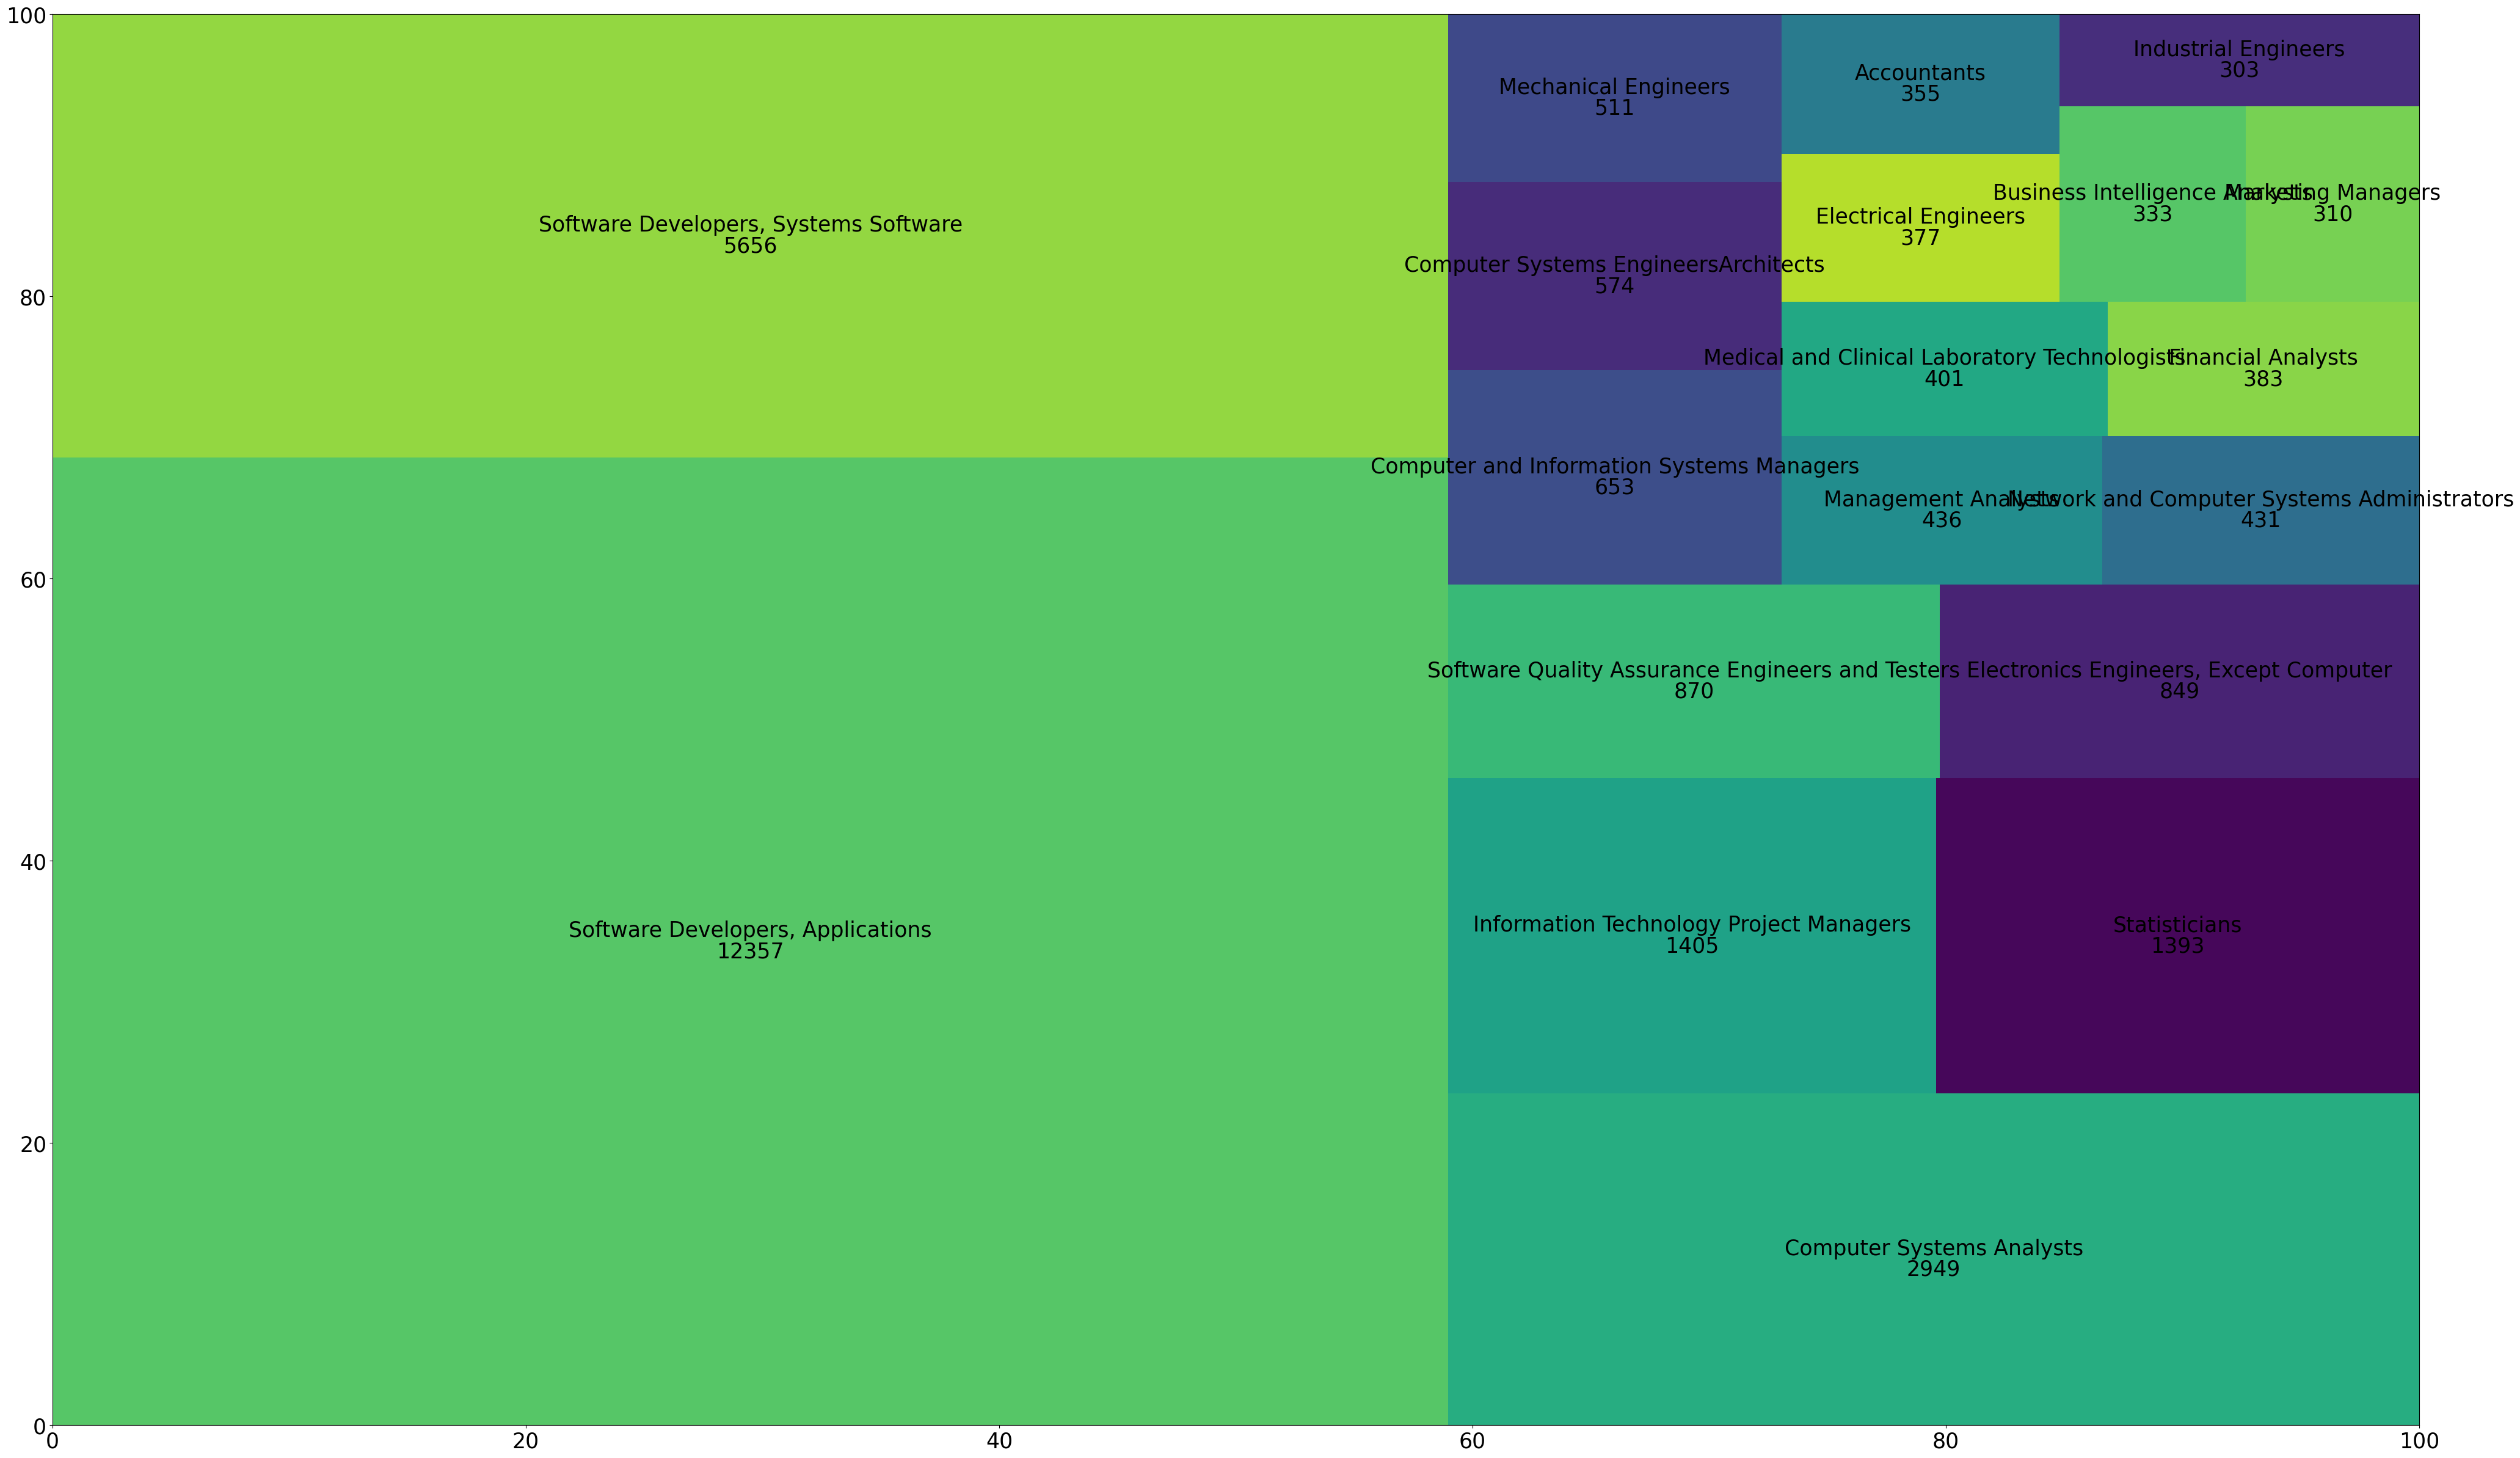

In [92]:
squarify.plot(sizes=df_sample['PW_SOC_TITLE'], label = df_sample.index, value = df_sample['PW_SOC_TITLE'])

LCA VISA 

In [14]:
df_e3 = df_main.loc[df["VISA_CLASS"] == "E-3 Australian"]
df_h = df_main.loc[df["VISA_CLASS"] == "H-1B"]
df_hc = df_main.loc[df["VISA_CLASS"] == "H-1B1 Chile"]
df_hs = df_main.loc[df["VISA_CLASS"] == "H-1B1 Singapore"]

NameError: name 'df' is not defined

In [ ]:
df_main["PW_WAGE_LEVEL"].describe(include='all')

LCA SOC_TITLE

In [190]:
df_Agri = df_main.loc[df_main["SOC_TITLE"] == 'Agricultural Inspectors']

In [191]:
df_Fina = df_main.loc[df_main["SOC_TITLE"] == "Financial Analysts" ]

In [204]:
df_Appl = df_main.loc[df_main["SOC_TITLE"] == "Software Developers, Applications" ]

In [264]:
df_syst = df_main.loc[df_main["SOC_TITLE"] == "Software Developers, Systems Software" ]

In [266]:
df_cai = df_main.loc[df_main["SOC_TITLE"] == "Computer and Information Systems Managers" ]

In [216]:
df_Appl.describe()

,PREVAILING_WAGE
count,83190.000000
mean,110168.568258
std,25362.376844
min,6659.450000
25%,91874.000000
50%,105040.000000
75%,125445.000000
max,217004.000000


LCA PREVAILING_WAGE

In [280]:
df_pw1 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'I']
df_pw2 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'II']
df_pw3 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'III']
df_pw4 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'IV']
#df_pw1 = df_main.loc[df["PW_WAGE_LEVEL"] == "I" ]
#df_pw2 = df_main.loc[df["PW_WAGE_LEVEL"] == "II"]
#df_pw3 = df_main.loc[df["PW_WAGE_LEVEL"] == "III"]
#df_pw4 = df_main.loc[df["PW_WAGE_LEVEL"] == "IV"]


In [237]:
df_pw1 = df_main.loc[df_main["PREVAILING_WAGE"] <= 78915 ]
df_pw2 = df_main.loc[(df_main["PREVAILING_WAGE"] >= 78915) & (df_main["PREVAILING_WAGE"] <= 121763)]
df_pw3 = df_main.loc[df_main["PREVAILING_WAGE"] > 121763 ]
df_sp = df_main.loc[df_main["PREVAILING_WAGE"] > 200000 ]



In [52]:
df_pw1.describe()

,PREVAILING_WAGE
count,43482.000000
mean,68462.877207
std,9893.833179
min,762.800000
25%,63794.000000
50%,70803.000000
75%,76066.000000
max,78915.000000


In [162]:
df_CA = df_main.loc[df["WORKSITE_STATE"] == "CA" ]
df_TX = df_main.loc[df["WORKSITE_STATE"] == "TX" ]
df_NY = df_main.loc[df["WORKSITE_STATE"] == "NY" ]
df_WA = df_main.loc[df["WORKSITE_STATE"] == "WA" ]
df_FL = df_main.loc[df["WORKSITE_STATE"] == "FL" ]


In [17]:
df.describe(include='all')

,PREVAILING_WAGE,VISA_CLASS,SOC_TITLE,WORKSITE_STATE
count,13176.000000,13176,13176,13176
unique,NaN,4,435,55
top,NaN,H-1B,"Software Developers, Applications",CA
freq,NaN,12472,4102,2080
mean,41.964276,NaN,NaN,NaN
std,16.195762,NaN,NaN,NaN
min,7.250000,NaN,NaN,NaN
25%,32.817500,NaN,NaN,NaN
50%,41.270000,NaN,NaN,NaN
75%,48.920000,NaN,NaN,NaN


In [9]:
df_index=df
df_index.index


Int64Index([270823, 265421, 265420, 152010, 132540, 187987, 189313, 162856,
             16045,  89188,
            ...
            241526,  67460, 173468, 240948, 100208,  55078,    193, 150373,
            222955, 254390],
           dtype='int64', length=13177)

In [7]:
df= df.sort_values(by='PREVAILING_WAGE', ascending=False)

NameError: name 'df_index' is not defined

In [184]:
df_FL.describe()

,PREVAILING_WAGE
count,7389.000000
mean,86554.976106
std,29072.323238
min,709.200000
25%,70158.000000
50%,81744.000000
75%,101130.000000
max,300000.000000


In [179]:
df_CA.describe(include='all')

,PREVAILING_WAGE,VISA_CLASS,SOC_TITLE,WORKSITE_STATE
count,57571.000000,57571,57571,57571
unique,NaN,4,407,1
top,NaN,H-1B,"Software Developers, Applications",CA
freq,NaN,55718,17567,57571
mean,127012.765163,NaN,NaN,NaN
std,35884.178832,NaN,NaN,NaN
min,1570.400000,NaN,NaN,NaN
25%,101192.000000,NaN,NaN,NaN
50%,126838.000000,NaN,NaN,NaN
75%,149915.500000,NaN,NaN,NaN


In [10]:
df.isnull()

,PUBLIC_DISCLOSURE
0,False
1,False
2,False
3,False
4,False
...,...
275652,False
275653,False
275654,False
275655,False


In [26]:
df.mode(axis = 0)

,PREVAILING_WAGE,VISA_CLASS,SOC_TITLE,WORKSITE_STATE
0,130894.0,H-1B,"Software Developers, Applications",CA


plot data

In [90]:
df_plot = df_kr

In [126]:
df_plot.describe(include="all")

,PW_SOC_TITLE,FOREIGN_WORKER_BIRTH_COUNTRY,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WORKSITE_STATE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,FOREIGN_WORKER_BIRTH_COUNTRY,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,EMPLOYER_NAME,country
count,646,646,646,646.000000,646,646,646,646,646,646,646,646,646
unique,125,1,4,NaN,1,38,5,424,1,5,285,486,1
top,"Software Developers, Applications",SOUTH KOREA,Level I,NaN,Year,CALIFORNIA,Bachelor's,See H.14,SOUTH KOREA,Bachelor's,BUSINESS ADMINISTRATION,GOOGLE LLC,SOUTH KOREA
freq,49,646,390,NaN,646,241,374,37,646,350,59,21,646
mean,NaN,NaN,NaN,75502.509288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,31889.698189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,19390.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,48173.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,68161.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,95430.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df_plot.describe()

,PW_WAGE
count,646.000000
mean,75502.509288
std,31889.698189
min,19390.000000
25%,48173.000000
50%,68161.500000
75%,95430.000000
max,190736.000000


In [190]:
df_sam = df_plot
df_sam = df_sam.sample(n=600,random_state=1004)
df_sam1 = df_main.sample(n=600,random_state=1004)['PW_WAGE']
df_sam1 = df_sam1.reset_index()
df_sam = df_sam.reset_index()
del df_sam['index']
del df_sam1['index']
df_sam['Averae PW'] = df_sam1 
df_sam.rename(columns={'PW_WAGE' : "KR_PW"}, inplace = True)

In [191]:
df_sam.describe(include='all')

,PW_SOC_TITLE,FOREIGN_WORKER_BIRTH_COUNTRY,PW_SKILL_LEVEL,KR_PW,PW_UNIT_OF_PAY,WORKSITE_STATE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,FOREIGN_WORKER_BIRTH_COUNTRY,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,EMPLOYER_NAME,country,Averae PW
count,600,600,600,600.000000,600,600,600,600,600,600,600,600,600,600.000000
unique,122,1,4,NaN,1,37,5,399,1,5,269,460,1,NaN
top,"Software Developers, Applications",SOUTH KOREA,Level I,NaN,Year,CALIFORNIA,Bachelor's,See H.14,SOUTH KOREA,Bachelor's,BUSINESS ADMINISTRATION,GOOGLE LLC,SOUTH KOREA,NaN
freq,48,600,358,NaN,600,221,350,34,600,331,53,20,600,NaN
mean,NaN,NaN,NaN,75770.296667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102439.298333
std,NaN,NaN,NaN,32176.726696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31693.931719
min,NaN,NaN,NaN,19390.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31741.000000
25%,NaN,NaN,NaN,48173.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80646.500000
50%,NaN,NaN,NaN,68161.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98831.000000
75%,NaN,NaN,NaN,96616.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120578.000000


<AxesSubplot:>

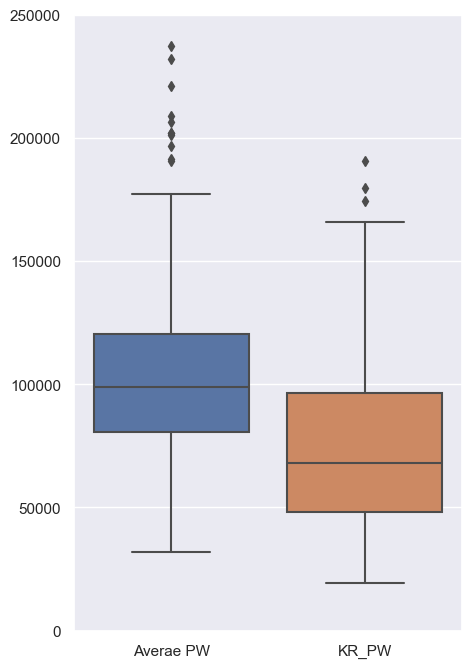

In [195]:
sns.set(rc={'figure.figsize':(5,8)}, font_scale = 1)
sns.boxplot(data=df_sam[['Averae PW', 'KR_PW']])


In [146]:
df_sam

,PW_SOC_TITLE,FOREIGN_WORKER_BIRTH_COUNTRY,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WORKSITE_STATE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,FOREIGN_WORKER_BIRTH_COUNTRY,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,EMPLOYER_NAME,country,General
33040,Statisticians,SOUTH KOREA,Level I,76981.0,Year,WASHINGTON,Master's,See H.14,SOUTH KOREA,Master's,QUANTITATIVE FINANCE,AMAZON.COM SERVICES LLC,SOUTH KOREA,NaN
47148,Assistant Professor,SOUTH KOREA,Level I,70640.0,Year,SOUTH CAROLINA,Doctorate,Finance or closely related field,SOUTH KOREA,Doctorate,FINANCE,THE UNIVERSITY OF SOUTH CAROLINA,SOUTH KOREA,NaN
22911,Assistant Professor,SOUTH KOREA,Level I,57760.0,Year,COLORADO,Doctorate,see H.14,SOUTH KOREA,Doctorate,ECONOMICS,UNIVERSITY OF DENVER,SOUTH KOREA,NaN
31368,Editors,SOUTH KOREA,Level II,117395.0,Year,NEW YORK,Master's,"Communications, Political Science or related",SOUTH KOREA,Master's,POLITICAL SCIENCE US EQUIVALENT,BLOOMBERG L.P.,SOUTH KOREA,NaN
46309,"Software Developers, Applications",SOUTH KOREA,Level I,98779.0,Year,CALIFORNIA,Bachelor's,"Computer Science, Computer and Information Tec...",SOUTH KOREA,Master's,COMPUTER AND INFORMATION TECHNOLOGY,"Cloudflare, Inc",SOUTH KOREA,NaN
44310,Quality Control Analysts,SOUTH KOREA,Level II,44533.0,Year,CALIFORNIA,Associate's,"CHEMICAL ENGINEERING, CHEMISTRY OR RELATED",SOUTH KOREA,Bachelor's,CHEMICAL ENGINEERING,ECUBE LABS CO,SOUTH KOREA,NaN
43307,Information Technology Project Managers,SOUTH KOREA,Level III,137363.0,Year,CALIFORNIA,Master's,COMPUTER SCIENCE,SOUTH KOREA,Master's,BUSINESS ADMINISTRATION,AMAZON.COM SERVICES LLC,SOUTH KOREA,NaN
3853,Clergy,SOUTH KOREA,Level I,50378.0,Year,WASHINGTON,Master's,Divinity,SOUTH KOREA,Master's,DIVINITY,FIRST KOREAN UNITED METHODIST CHURCH OF TACOMA,SOUTH KOREA,NaN
14838,"Software Developers, Systems Software",SOUTH KOREA,Level III,117021.0,Year,CALIFORNIA,Master's,"Electrical Engineering, Computer Engineering, ...",SOUTH KOREA,Bachelor's,COMPUTER ENGINEERING,"QUALCOMM ATHEROS, INC.",SOUTH KOREA,NaN
27423,Art Directors,SOUTH KOREA,Level I,74318.0,Year,NEW YORK,Bachelor's,"New Media and Digital Design, or a related field",SOUTH KOREA,Bachelor's,NEW MEDIA DIGITAL DESIGN,"GODADDY.COM, LLC",SOUTH KOREA,NaN


<AxesSubplot:xlabel='PW_SOC_TITLE', ylabel='Count'>

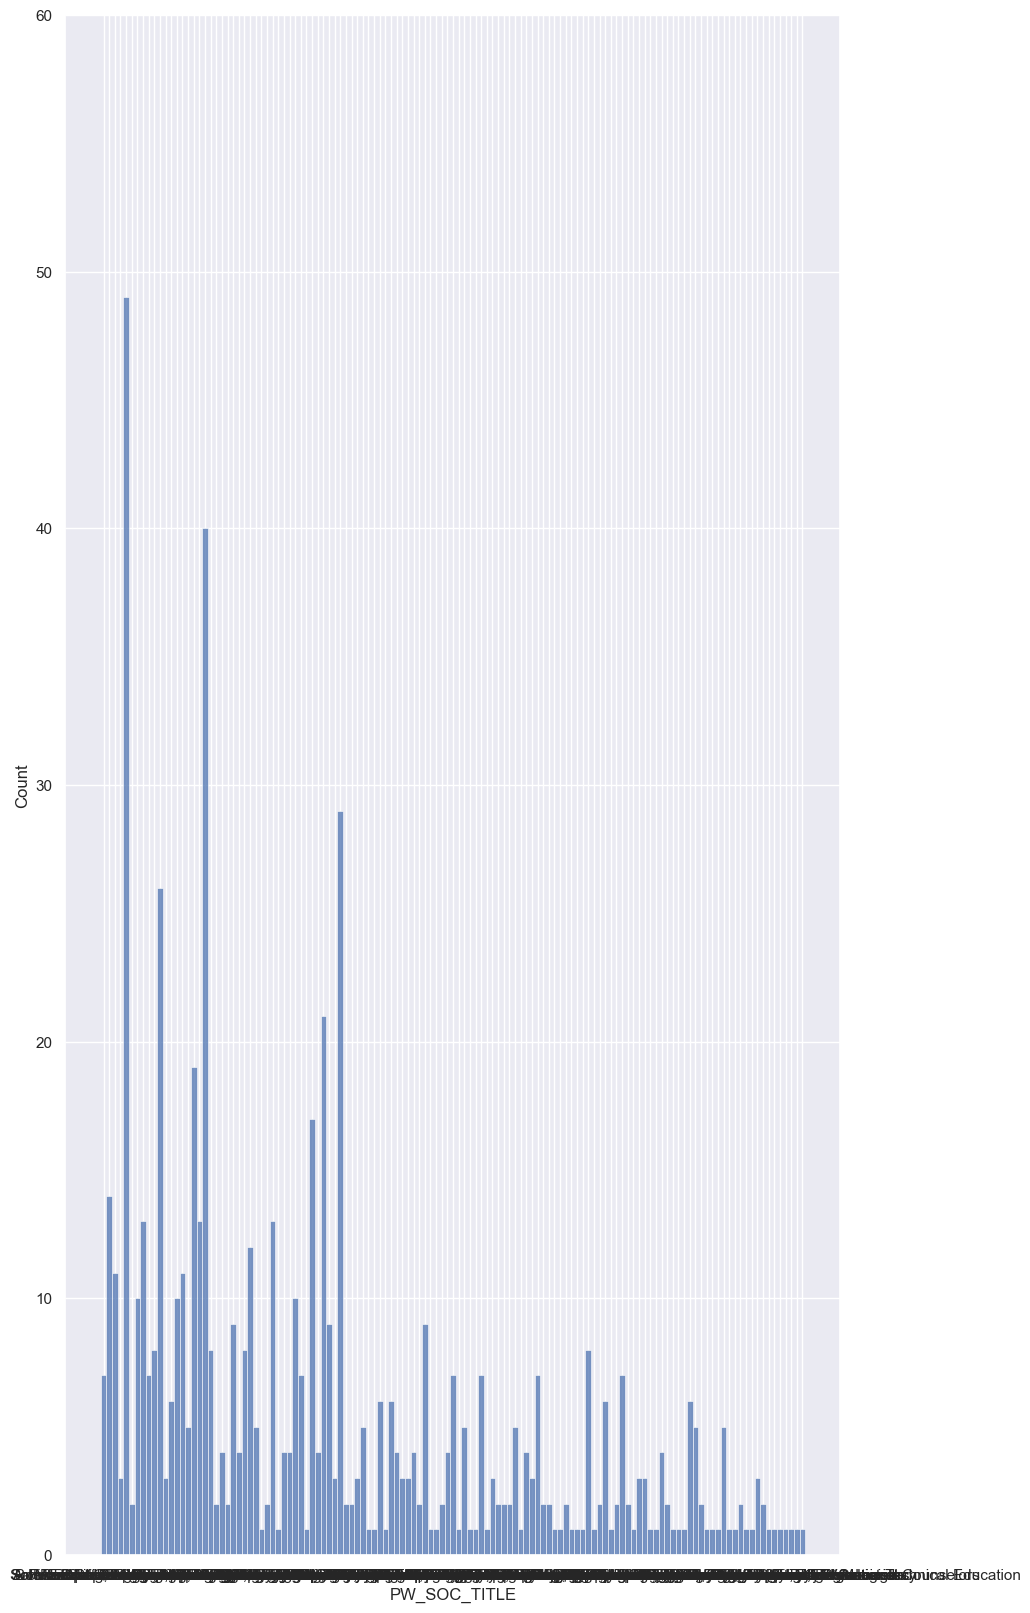

In [173]:

sns.set(rc={'figure.figsize':(10,20)}, font_scale = 1)
sns.histplot(data=df_plot, y= "PW_SOC_TITLE")

<AxesSubplot:xlabel='Count', ylabel='WORKSITE_STATE'>

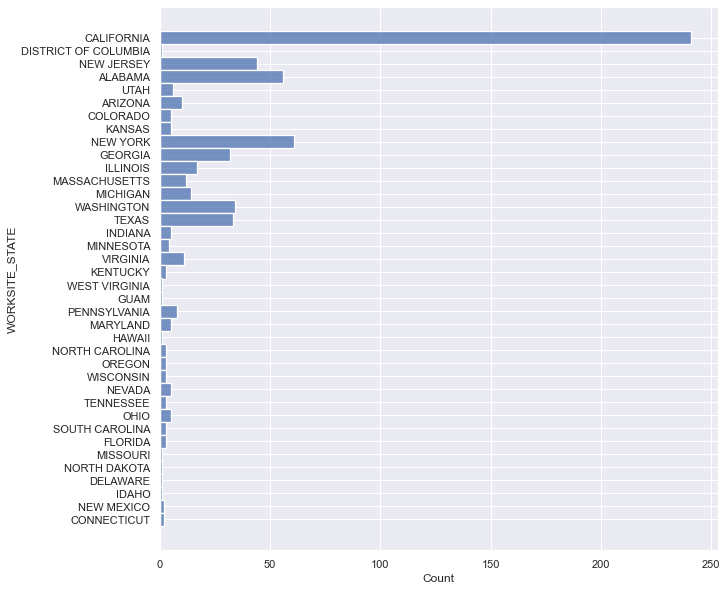

In [94]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale = 1)
sns.histplot(data=df_plot, y= "WORKSITE_STATE")

In [185]:
df_sam = pd.DataFrame(df_plot['EMPLOYER_NAME'].value_counts())
df_sam = df_sam.loc[df_sam['EMPLOYER_NAME'] > 3]
df_sam

df_sam = pd.DataFrame(df_plot['PW_SOC_TITLE'].value_counts()[0:20])

column = 'PW_SOC_TITLE'

Text(0.5, 1.0, 'SOC - KR Worker')

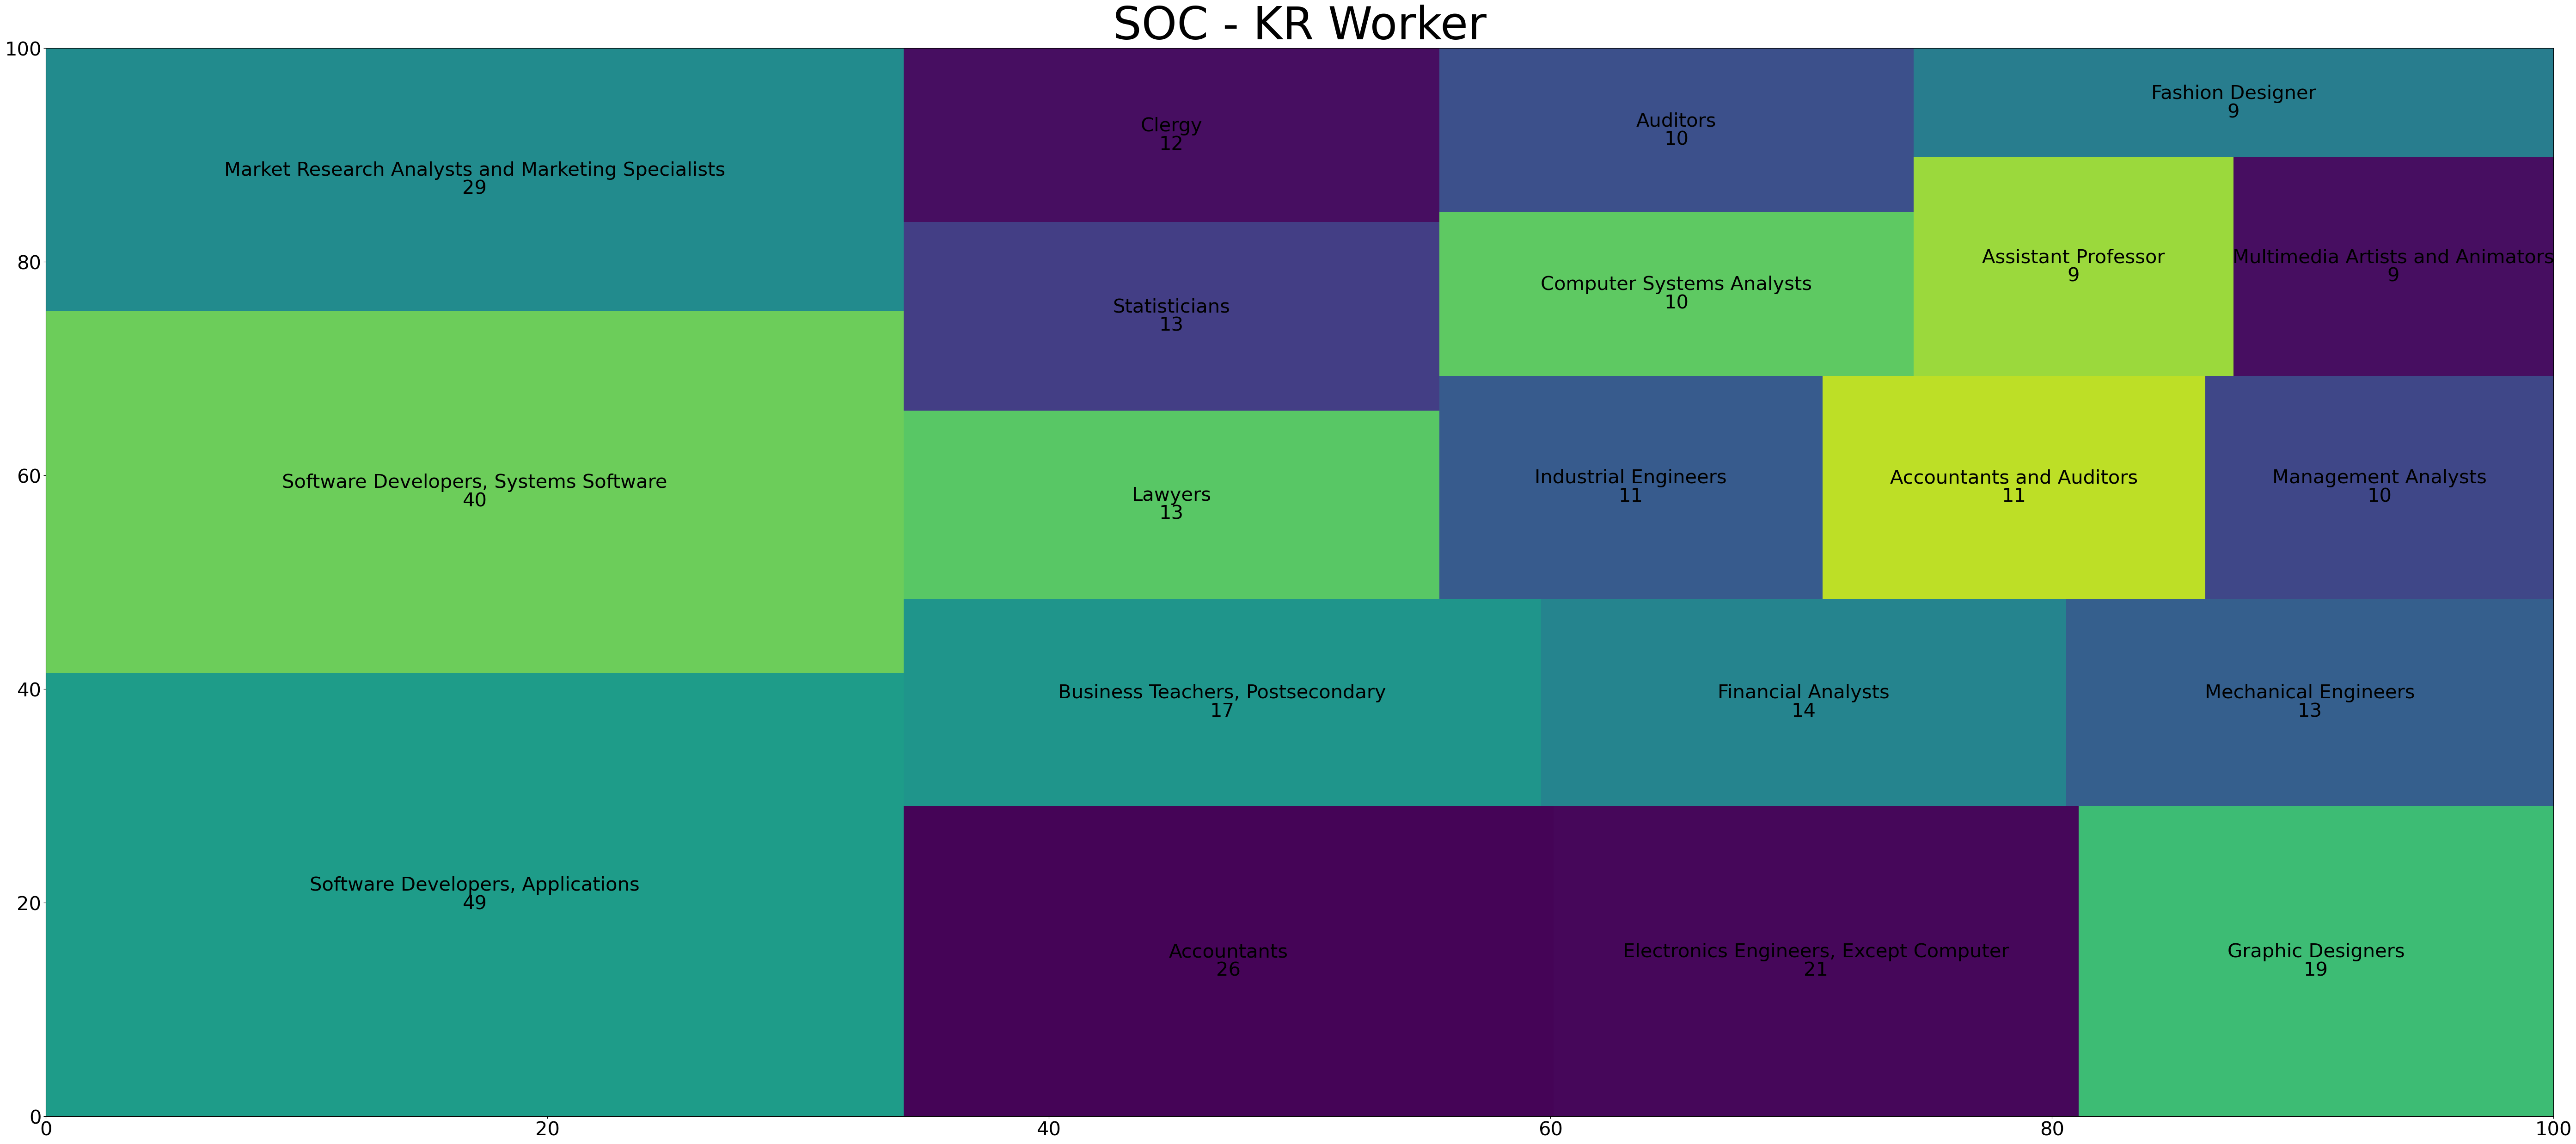

In [187]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (70, 30)
plt.rcParams['font.size'] = 30
plt.rcParams['font.stretch'] = 'extra-expanded'
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.ylim(100, 20000)
squarify.plot(sizes=df_sam[column], label = df_sam[column].index, value = df_sam[column])
plt.title("SOC - KR Worker", fontsize = 70)

In [118]:
df_plot.describe(include='all')

,PW_SOC_TITLE,FOREIGN_WORKER_BIRTH_COUNTRY,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WORKSITE_STATE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,FOREIGN_WORKER_BIRTH_COUNTRY,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,EMPLOYER_NAME,country
count,646,646,646,646.000000,646,646,646,646,646,646,646,646,646
unique,125,1,4,NaN,1,38,5,424,1,5,285,486,1
top,"Software Developers, Applications",SOUTH KOREA,Level I,NaN,Year,CALIFORNIA,Bachelor's,See H.14,SOUTH KOREA,Bachelor's,BUSINESS ADMINISTRATION,GOOGLE LLC,SOUTH KOREA
freq,49,646,390,NaN,646,241,374,37,646,350,59,21,646
mean,NaN,NaN,NaN,75502.509288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,31889.698189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,19390.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,48173.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,68161.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,95430.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
frequency = df_plot["MINIMUM_EDUCATION"].value_counts()
df_plot_pie = pd.DataFrame(frequency)

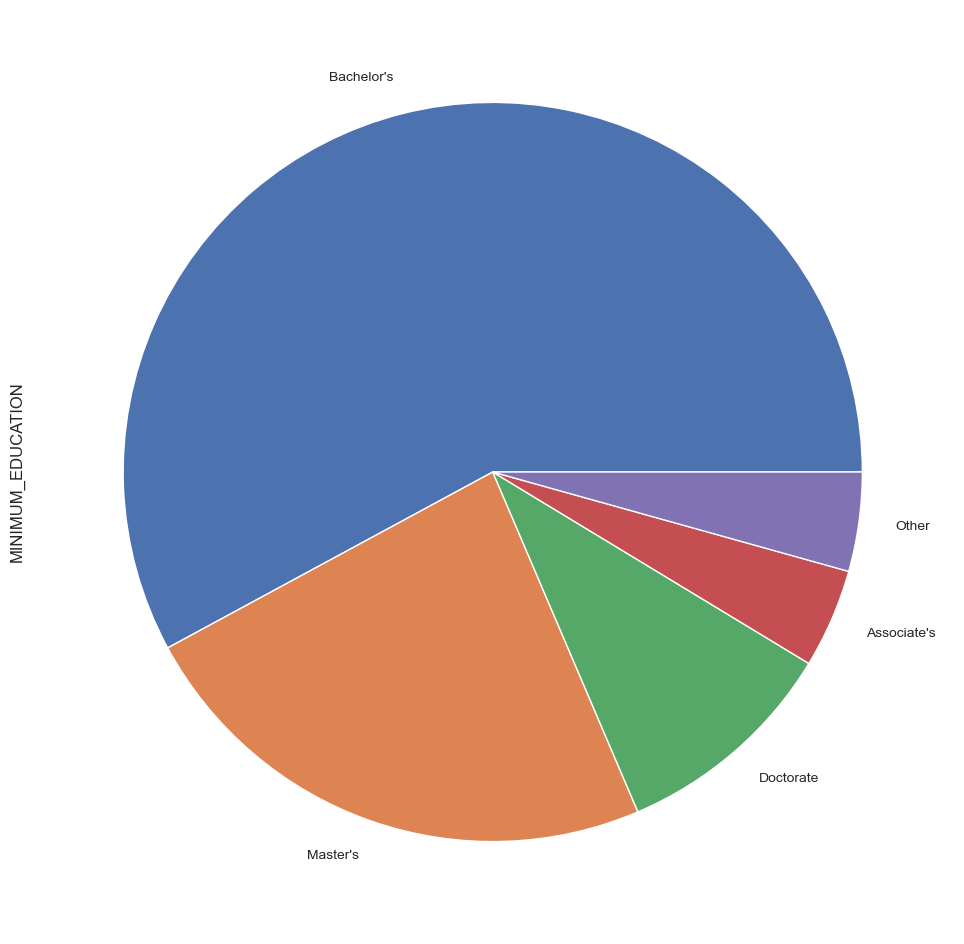

In [166]:
plot = df_plot_pie.plot.pie(y='MINIMUM_EDUCATION', figsize=(12, 12), fontsize =10, legend = 0, rot = 50, label='MINIMUM_EDUCATION')

In [93]:
sns.set(rc={'figure.figsize':(80,70)}, font_scale = 7)
sns.histplot(data=df_plot, y= "SOC_TITLE")

NameError: name 'df_plot' is not defined

In [105]:
df_ca = df_main.loc[df_main['WORKSITE_STATE'] == 'CALIFORNIA'] 
df_tx = df_main.loc[df_main['WORKSITE_STATE'] == 'TEXAS'] 

df_sample1 = pd.DataFrame(df_ca.sample(n=4000,random_state=1004)["PW_WAGE"])
df_sample2 = pd.DataFrame(df_tx.sample(n=4000,random_state=1004)["PW_WAGE"])
df_sample1.columns = ['CA_PW']
df_sample2.columns = ['TX_PW']
df_sample1 = df_sample1.reset_index()
df_sample2 = df_sample2.reset_index()
del df_sample1['index']
del df_sample2['index']

df_new = pd.concat([df_sample1, df_sample2], axis=1)
df_plot = df_new

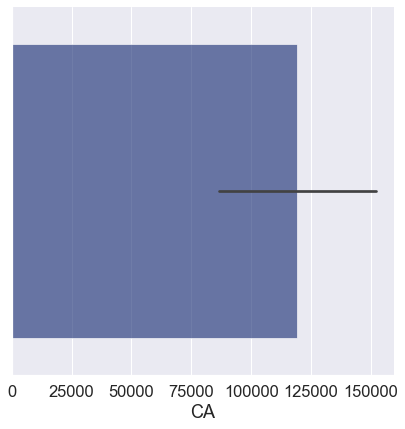

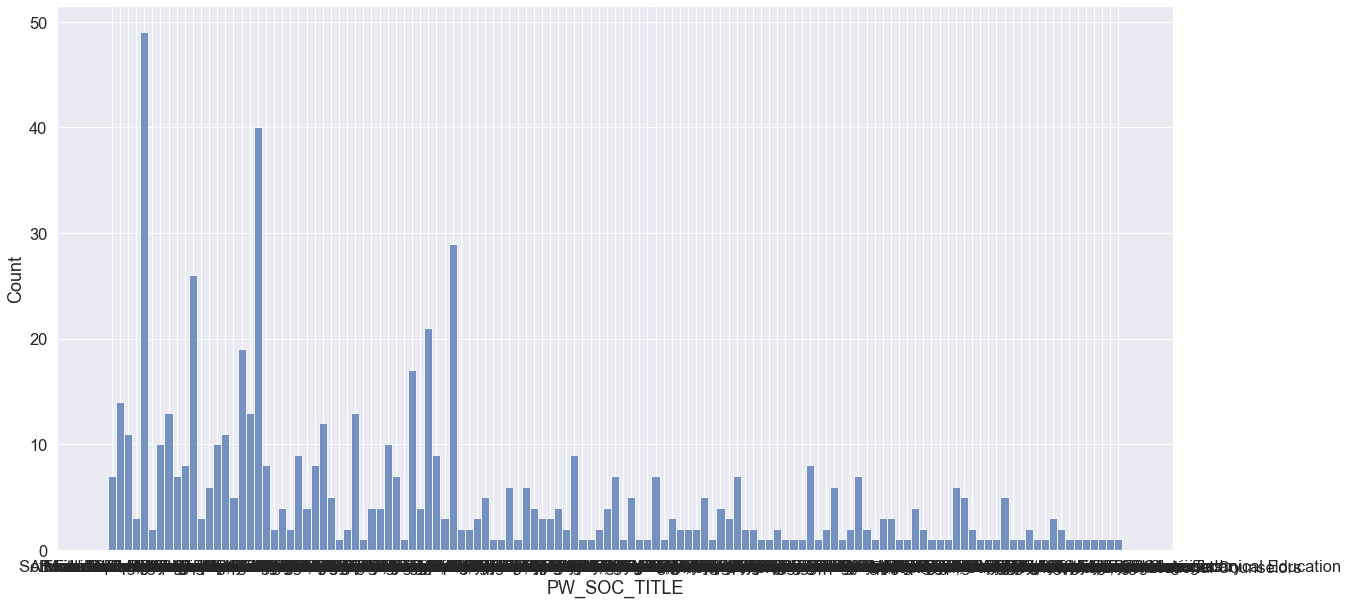

In [98]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale = 1.5)
g =sns.histplot(data=df_plot['PW_SOC_TITLE'])

In [113]:
string = "Hey! What's up?"
string = re.sub("\!|\'|\?","",string)
print(string)


Hey Whats up


In [21]:
wage = ['PREVAILING_WAGE', 'PW_UNIT_OF_PAY' , 'PW_TRACKING_NUMBER', 'PW_WAGE_LEVEL', 'PW_OES_YEAR', 'PW_OTHER_SOURCE', 'PW_OTHER_YEAR',
'PW_SURVEY_PUBLISHER', 'PW_SURVEY_NAME']


num = ['TOTAL_WORKER_POSITIONS' ,'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'NAICS_CODE', 'WORKSITE_WORKERS', 'PW_OTHER_YEAR', 'TOTAL_WORKSITE_LOCATIONS']

In [58]:
num = ['NAICS_CODE', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 'ALT_TRAINING_MONTHS', 'ALT_EXPERIENCE_MONTHS'
      , 'ALT_PWD_WAGE_RATE']

In [285]:
num = ['EMPLOYER_NUM_EMPLOYEES', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 
      'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'FOREIGN_WORKER_YRS_ED_COMP', "PREVAILING_WAGE"]

In [292]:
df_main.describe()

,PREVAILING_WAGE
count,249345.000000
mean,102271.253935
std,33182.971215
min,709.200000
25%,78915.000000
50%,97760.000000
75%,121451.000000
max,306530.000000


In [291]:

corr = df_main[num].corr(method = 'pearson') #피어슨 상관계수를 구하는 것

fig = plt.figure(figsize = (16, 12)) #시각화
ax = fig.gca()

sns.set(font_scale=1.5) # seaborn library font 설정
hm = sns.heatmap(corr.values,#heatmap 사용
                 annot=True, 
                 fmt='.2f', #소수점 2번째 자리
                 annot_kws={'size': 15},
                 yticklabels=num,
                 xticklabels=num,
                 ax=ax)
plt.tight_layout() #창에 딱 맞게 설정
plt.show()

KeyError: "['REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'EMPLOYER_NUM_EMPLOYEES', 'FOREIGN_WORKER_YRS_ED_COMP'] not in index"

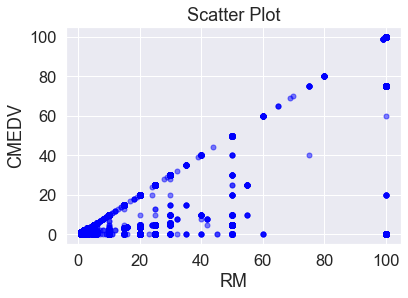

In [14]:
plt.plot('TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('RM')
plt.ylabel('CMEDV')
plt.show()